# Линейна и логистична регресия

## Какво са $X$ и $y$?

$X$ и $y$ са входните данни на нашия алгоритъм за машинно самообучение. $X$ е матрица (таблица) от данни, където всеки ред е инстанция на данните, а всяка колона е различна тяхна характеристика. $y$ пък е списък с целеви стойности (labels).

Ако се опитваме да оценим цената на апартаменти в град, всеки ред в $X$ е апартамент (чиято цена знаем), а всяка колона е различна характеристика на апартамента (площ, оценка на квартала, близост до метро, престъпност наоколо и т.н.). $y$ съдържа цените, като първия ред на $X$ съотвества на цената на първия ред от $y$, втория ред на $X$ съответства на втория ред от $y$ и т.н.

## Какво са features (характеристики)?

Набора от характеристики, които знаем за данните. Алгоритмите търсят статистическа зависимост между тях и търсения отговор (напр. връзка между площ и цена).

Пример в друмерното простарство:

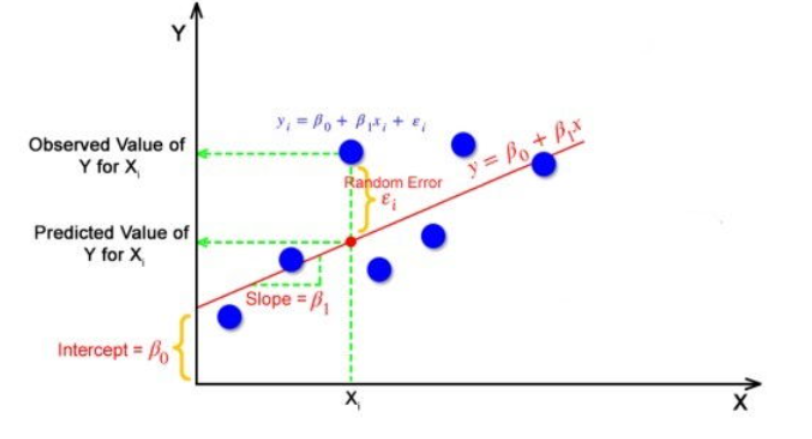

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
import time
from ipywidgets import Output, HBox
from IPython.display import display, clear_output
from sklearn.datasets import make_blobs, load_diabetes
import pandas as pd

In [2]:
X, y = datasets.make_regression(
    n_samples=50,
    n_features=1,
    noise=20,
    random_state=4,
)

In [3]:
X.shape, y.shape

((50, 1), (50,))

In [4]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.reshape(-1, 1)).squeeze()

In [5]:
X.shape, y.shape

((50, 1), (50,))

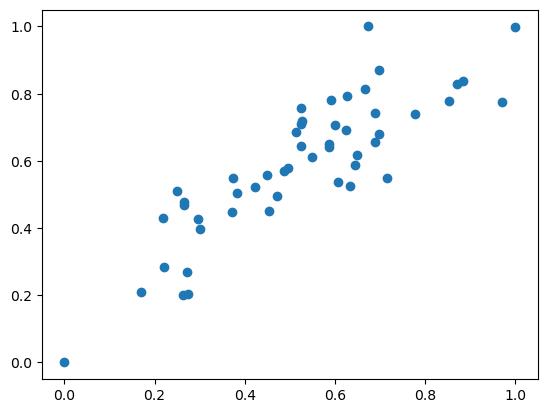

In [6]:
plt.scatter(X, y)

In [7]:
SEED = 42

In [8]:
def predict(weights, bias, X):
    return np.dot(X, weights) + bias

In [9]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [10]:
def hypothesis(W, b, X):
    return X * W + b

In [11]:
np.random.seed(SEED)
W = np.random.randn(1)[0] * 10
b = np.random.randn(1)[0] * 10
W, b

(4.967141530112327, -1.3826430117118464)

In [12]:
mean_squared_error(y, predict(W, b, X))

1.5808949587071282

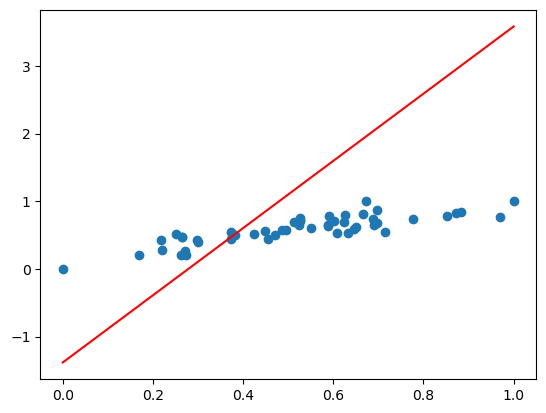

In [13]:
plt.scatter(X, y)
plt.plot(hypothesis(W, b, np.array([0, 1])), color="r")

In [14]:
def f(x):
    return 3 * x**2 - 4 * x + 5

In [15]:
def f1(x):
    return 6 * x - 4

In [16]:
f1(3.0)

14.0

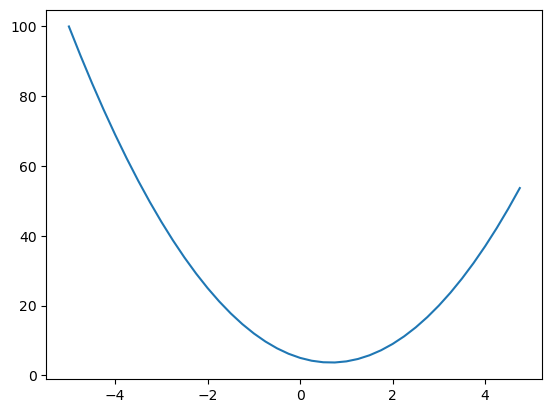

In [17]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [18]:
h = 0.000001
x = 2/3
(f(x + h) - f(x)) / h

2.999378523327323e-06

In [19]:
f1(2 / 3)

0.0

In [20]:
def g(x1, x2):
    return x1**2 + x2**4

In [21]:
g(0, 0)

0

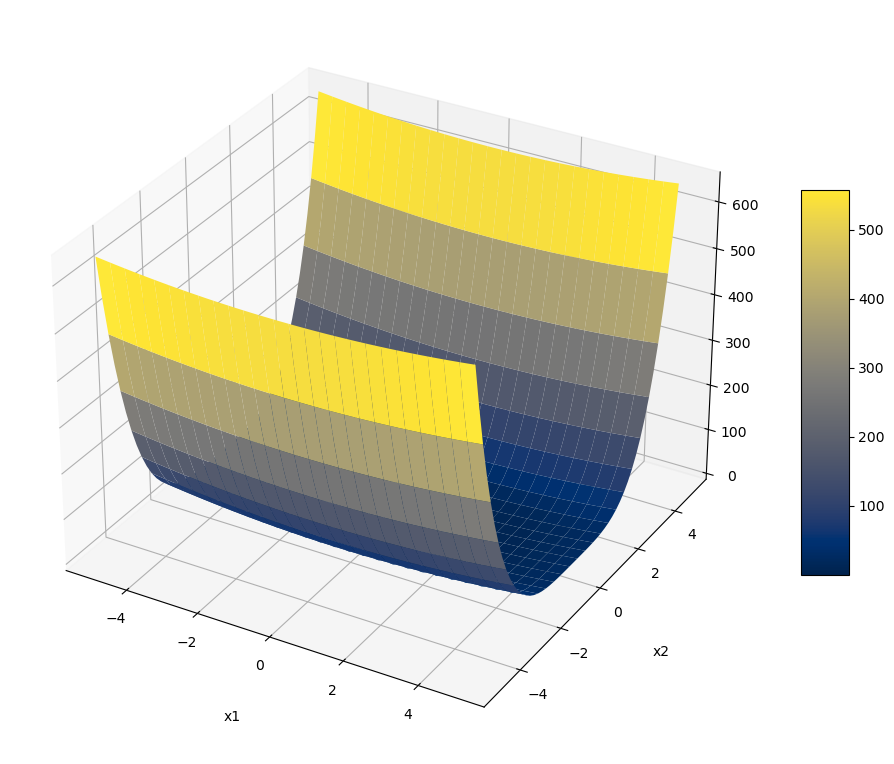

In [22]:
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection="3d")

X1 = np.arange(-5, 5.1, 0.2)
X2 = np.arange(-5, 5.1, 0.2)

X1, X2 = np.meshgrid(X1, X2)
Y = g(X1, X2)

surf = ax.plot_surface(X1, X2, Y, cmap=plt.cm.cividis)

# Set axes label
ax.set_xlabel("x1", labelpad=20)
ax.set_ylabel("x2", labelpad=20)
ax.set_zlabel("y", labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

In [23]:
g(5, -5)

650

100%|██████████| 10000/10000 [00:00<00:00, 1250500.58it/s]

0.6765410763886508 -0.3526029247165862


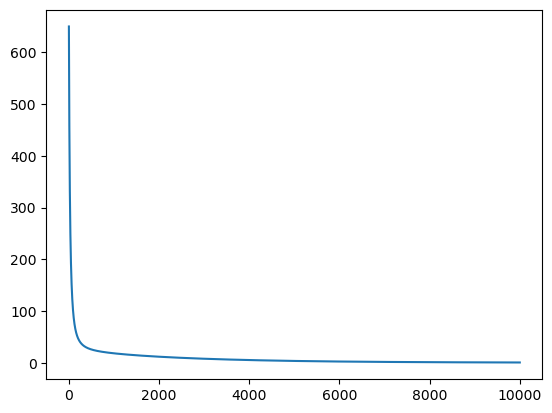

In [24]:
lr = 0.0001
x1 = 5
x2 = -5

def g1(x1):
    return 2 * x1

def g2(x2):
    return 4 * x2**3


values = []
for i in tqdm(range(10000)):
    values.append(g(x1, x2))
    x1 -= lr * g1(x1)
    x2 -= lr * g2(x2)
values.append(g(x1, x2))

print(x1, x2)
plt.plot(values)
plt.show()

100%|██████████| 1000/1000 [00:00<00:00, 454667.10it/s]

4.0935717914510406 -1.0899015399153456


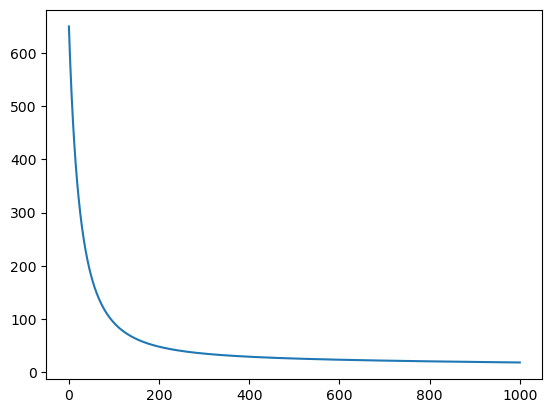

In [25]:

lr = 0.0001
x1 = 5
x2 = -5

def g1(x1):
    return 2 * x1


def g2(x2):
    return 4 * x2**3


values = []
for i in tqdm(range(1000)):
    values.append(g(x1, x2))
    x1 -= lr * (g(x1 + h, x2) - g(x1, x2)) / h
    x2 -= lr * (g(x1, x2 + h) - g(x1, x2)) / h

values.append(g(x1, x2))

print(x1, x2)
plt.plot(values)
plt.show()

![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [26]:
def linearRegression(X, y, n_iters=10000, learning_rate=0.01, visualize=False):
    # x.shape: N x D
    # y.shape: N

    # Only for visualization
    if visualize:
        scater_out = Output()
        loss_out = Output()
        all_outs = HBox([scater_out, loss_out])
        display(all_outs)

    n_samples, n_features = X.shape
    # weights.shape: D, bias.shape: 1
    weights = np.random.normal(0.0, 1.0, n_features)
    bias = 1
    losses = []

    for _ in tqdm(range(n_iters)):

        # y_predicted.shape: N
        y_predicted = np.dot(X, weights) + bias

        losses.append(mean_squared_error(y, y_predicted))

        # compute gradients slow
        # dw = np.zeros(n_features)
        # for n in range(n_samples):
        #    for d in range(n_features):
        #        dw[d] += (y_predicted[n] - y[n]) * X[n, d]
        # dw /= n_samples
        # db = 0
        # for i in range(len(y)):
        #    db += (y_predicted[i] - y[i])
        # db /= n_samples

        # compute gradients fast
        # dw.shape: D, db.shape: 1
        # x.shape: D x N
        # y_predicted - y.shape: N
        dw = np.dot(X.T, (y_predicted - y)) / n_samples
        db = np.sum(y_predicted - y) / n_samples

        # update parameters
        weights -= learning_rate * dw
        bias -= learning_rate * db

        # Only for visualization
        if visualize:
            with scater_out:
                clear_output(wait=True)
                plt.scatter(X, y)
                plt.plot(hypothesis(weights, bias, np.array([0, 1])), color="r")
                plt.title("Hypothesis")
                plt.show(block=False)

            with loss_out:
                clear_output(wait=True)
                plt.plot(losses)
                plt.title("Loss curve")
                plt.show(block=False)

    return weights, bias

In [27]:
W, b = linearRegression(X, y)

100%|██████████| 10000/10000 [00:00<00:00, 52462.70it/s]


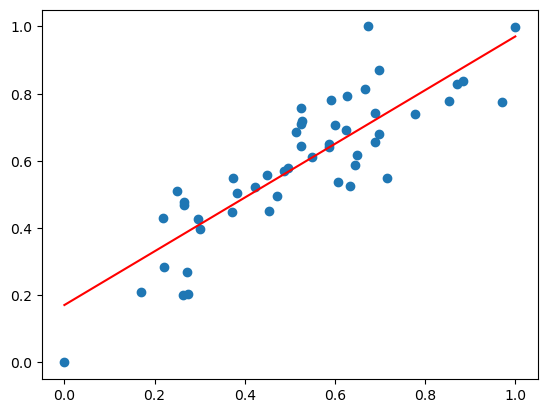

In [28]:
plt.scatter(X, y)
plt.plot(hypothesis(W, b, np.array([0, 1])), color="r")

In [29]:
mean_squared_error(y, predict(W, b, X))

0.011002633214056335

In [30]:
W, b = linearRegression(X, y, n_iters=100, learning_rate=0.5, visualize=True)

  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:00<00:12,  8.17it/s]

  2%|▏         | 2/100 [00:00<00:11,  8.46it/s]

  3%|▎         | 3/100 [00:00<00:14,  6.80it/s]

  4%|▍         | 4/100 [00:00<00:12,  7.44it/s]

  5%|▌         | 5/100 [00:00<00:12,  7.71it/s]

  6%|▌         | 6/100 [00:00<00:13,  7.13it/s]

  7%|▋         | 7/100 [00:00<00:12,  7.52it/s]

  8%|▊         | 8/100 [00:01<00:11,  7.90it/s]

  9%|▉         | 9/100 [00:01<00:11,  8.13it/s]

 10%|█         | 10/100 [00:01<00:10,  8.32it/s]

 11%|█         | 11/100 [00:01<00:11,  8.02it/s]

 12%|█▏        | 12/100 [00:01<00:12,  7.22it/s]

 13%|█▎        | 13/100 [00:01<00:11,  7.43it/s]

 14%|█▍        | 14/100 [00:01<00:11,  7.40it/s]

 15%|█▌        | 15/100 [00:02<00:12,  6.87it/s]

 16%|█▌        | 16/100 [00:02<00:11,  7.28it/s]

 17%|█▋        | 17/100 [00:02<00:11,  7.44it/s]

 18%|█▊        | 18/100 [00:02<00:11,  7.45it/s]

 19%|█▉        | 19/100 [00:02<00:10,  7.64it/s]

 20%|██        | 20/100 [00:02<00:11,  6.87it/s]

 21%|██        | 21/100 [00:02<00:10,  7.30it/s]

 22%|██▏       | 22/100 [00:02<00:10,  7.73it/s]

 23%|██▎       | 23/100 [00:03<00:09,  8.01it/s]

 24%|██▍       | 24/100 [00:03<00:10,  7.26it/s]

 25%|██▌       | 25/100 [00:03<00:10,  7.43it/s]

 26%|██▌       | 26/100 [00:03<00:09,  7.67it/s]

 27%|██▋       | 27/100 [00:03<00:09,  7.79it/s]

 28%|██▊       | 28/100 [00:03<00:09,  7.79it/s]

 29%|██▉       | 29/100 [00:03<00:10,  7.07it/s]

 30%|███       | 30/100 [00:03<00:09,  7.39it/s]

 31%|███       | 31/100 [00:04<00:08,  7.73it/s]

 32%|███▏      | 32/100 [00:04<00:09,  7.37it/s]

 33%|███▎      | 33/100 [00:04<00:08,  7.59it/s]

 34%|███▍      | 34/100 [00:04<00:08,  7.89it/s]

 35%|███▌      | 35/100 [00:04<00:08,  7.69it/s]

 36%|███▌      | 36/100 [00:04<00:08,  7.71it/s]

 37%|███▋      | 37/100 [00:04<00:09,  6.83it/s]

 38%|███▊      | 38/100 [00:05<00:08,  7.09it/s]

 39%|███▉      | 39/100 [00:05<00:08,  7.32it/s]

 40%|████      | 40/100 [00:05<00:08,  7.49it/s]

 41%|████      | 41/100 [00:05<00:07,  7.77it/s]

 42%|████▏     | 42/100 [00:05<00:07,  7.75it/s]

 43%|████▎     | 43/100 [00:05<00:07,  7.68it/s]

 44%|████▍     | 44/100 [00:05<00:07,  7.86it/s]

 45%|████▌     | 45/100 [00:05<00:06,  8.19it/s]

 46%|████▌     | 46/100 [00:06<00:07,  7.46it/s]

 47%|████▋     | 47/100 [00:06<00:06,  7.98it/s]

 48%|████▊     | 48/100 [00:06<00:06,  8.32it/s]

 49%|████▉     | 49/100 [00:06<00:06,  8.03it/s]

 50%|█████     | 50/100 [00:06<00:06,  8.08it/s]

 51%|█████     | 51/100 [00:06<00:05,  8.38it/s]

 52%|█████▏    | 52/100 [00:06<00:05,  8.45it/s]

 53%|█████▎    | 53/100 [00:06<00:05,  8.34it/s]

 54%|█████▍    | 54/100 [00:07<00:06,  6.74it/s]

 55%|█████▌    | 55/100 [00:07<00:06,  6.73it/s]

 56%|█████▌    | 56/100 [00:07<00:06,  6.81it/s]

 57%|█████▋    | 57/100 [00:07<00:05,  7.25it/s]

 58%|█████▊    | 58/100 [00:07<00:05,  7.58it/s]

 59%|█████▉    | 59/100 [00:07<00:05,  7.79it/s]

 60%|██████    | 60/100 [00:07<00:05,  7.83it/s]

 61%|██████    | 61/100 [00:08<00:04,  7.99it/s]

 62%|██████▏   | 62/100 [00:08<00:04,  8.23it/s]

 63%|██████▎   | 63/100 [00:08<00:05,  7.34it/s]

 64%|██████▍   | 64/100 [00:08<00:05,  7.19it/s]

 65%|██████▌   | 65/100 [00:08<00:04,  7.51it/s]

 66%|██████▌   | 66/100 [00:08<00:04,  7.39it/s]

 67%|██████▋   | 67/100 [00:08<00:04,  7.18it/s]

 68%|██████▊   | 68/100 [00:09<00:04,  7.22it/s]

 69%|██████▉   | 69/100 [00:09<00:04,  7.18it/s]

 70%|███████   | 70/100 [00:09<00:04,  6.47it/s]

 71%|███████   | 71/100 [00:09<00:04,  6.10it/s]

 72%|███████▏  | 72/100 [00:09<00:04,  6.34it/s]

 73%|███████▎  | 73/100 [00:09<00:03,  6.83it/s]

 74%|███████▍  | 74/100 [00:09<00:03,  7.35it/s]

 75%|███████▌  | 75/100 [00:10<00:03,  7.50it/s]

 76%|███████▌  | 76/100 [00:10<00:03,  7.64it/s]

 77%|███████▋  | 77/100 [00:10<00:03,  7.00it/s]

 78%|███████▊  | 78/100 [00:10<00:03,  6.45it/s]

 79%|███████▉  | 79/100 [00:10<00:03,  5.26it/s]

 80%|████████  | 80/100 [00:11<00:05,  3.62it/s]

 81%|████████  | 81/100 [00:11<00:05,  3.22it/s]

 82%|████████▏ | 82/100 [00:11<00:05,  3.14it/s]

 83%|████████▎ | 83/100 [00:12<00:05,  3.07it/s]

 84%|████████▍ | 84/100 [00:12<00:05,  2.86it/s]

 85%|████████▌ | 85/100 [00:12<00:04,  3.20it/s]

 86%|████████▌ | 86/100 [00:13<00:04,  3.39it/s]

 87%|████████▋ | 87/100 [00:13<00:03,  3.56it/s]

 88%|████████▊ | 88/100 [00:13<00:03,  3.28it/s]

 89%|████████▉ | 89/100 [00:14<00:03,  3.54it/s]

 90%|█████████ | 90/100 [00:14<00:02,  3.62it/s]

 91%|█████████ | 91/100 [00:14<00:02,  3.59it/s]

 92%|█████████▏| 92/100 [00:14<00:02,  3.32it/s]

 93%|█████████▎| 93/100 [00:15<00:01,  3.56it/s]

 94%|█████████▍| 94/100 [00:15<00:01,  3.58it/s]

 95%|█████████▌| 95/100 [00:15<00:01,  3.34it/s]

 96%|█████████▌| 96/100 [00:16<00:01,  3.46it/s]

 97%|█████████▋| 97/100 [00:16<00:00,  3.12it/s]

 98%|█████████▊| 98/100 [00:16<00:00,  3.16it/s]

 99%|█████████▉| 99/100 [00:17<00:00,  3.22it/s]

100%|██████████| 100/100 [00:17<00:00,  5.77it/s]


In [31]:
W

array([0.84448415])

In [32]:
data = load_diabetes()
df = pd.DataFrame(data["data"], columns=data["feature_names"])
df["target"] = data["target"]
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [33]:
print(load_diabetes()["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [34]:
X = np.array(df.drop("target", axis=1))
y = np.array(df["target"])

In [35]:
X.shape

(442, 10)

In [36]:
W, b = linearRegression(X, y, n_iters=10000)

100%|██████████| 10000/10000 [00:00<00:00, 11843.60it/s]


In [37]:
mean_squared_error(y, predict(W, b, X))

3934.658314628577

Try the slow version!

In [38]:
W, b = linearRegression(X, y, n_iters=10000)

100%|██████████| 10000/10000 [00:00<00:00, 15204.03it/s]


In [39]:
mean_squared_error(y, predict(W, b, X))

3939.1385171209963

What happens with random weights

In [40]:
W_random = np.random.normal(0.0, 1.0, X.shape[1])
b_random = np.random.normal(0.0, 1.0)
mean_squared_error(y, predict(W_random, b_random, X))

28826.083748043253

## Логистична регресия

![image.png](attachment:image.png)

In [41]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

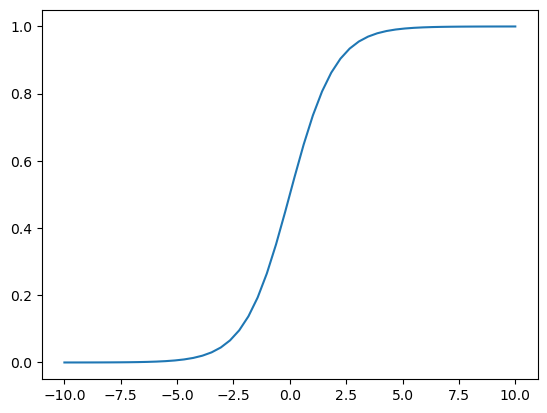

In [42]:
x = np.linspace(-10, 10)
plt.plot(x, sigmoid(x))

In [43]:
def graph(W, b, range):
    x = np.array(range)
    y = (-b - W[0] * x) / W[1]
    plt.plot(x, y)

In [44]:
X, y = make_blobs(n_samples=40, centers=2, n_features=2, cluster_std=3, random_state=11)
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.reshape(-1, 1)).squeeze()

In [45]:
X.shape, y.shape

((40, 2), (40,))

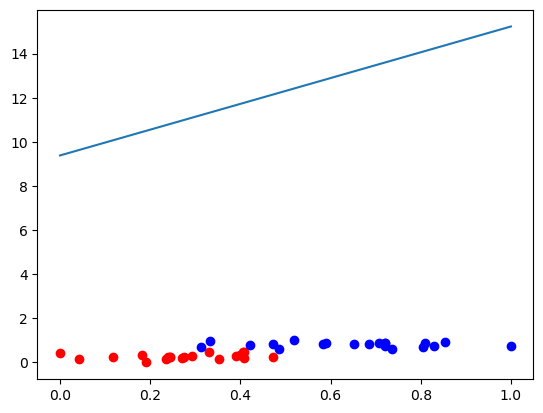

In [46]:
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], c="r")
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], c="b")
W = np.random.randn(2)
b = np.random.randn(1)
graph(W, b, [0, 1])

In [47]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [48]:
def getLogits(X, W, b):
    return sigmoid(np.dot(X, W) + b)

In [49]:
def predict(X, W, b):
    logits = getLogits(X, W, b)
    return [1 if i > 0.5 else 0 for i in logits]

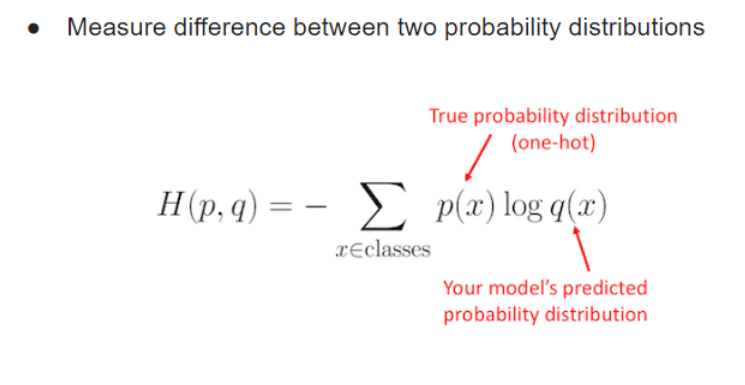

In [50]:
def crossEntropy(y_true, y_pred):

    return -np.mean((1-y_true) * np.log(1-y_pred + 1e-7) + y_true * np.log(y_pred + 1e-7))

In [51]:
crossEntropy(np.array([1, 0]), np.array([0.1, 0.9]))

2.302584092994546

In [52]:
crossEntropy(np.array([1, 0]), np.array([0.6, 0.4]))

0.510825457099338

In [53]:
crossEntropy(np.array([1, 0]), np.array([0.99, 0.01]))

0.010050234843405595

In [54]:
crossEntropy(np.array([1, 0]), np.array([1, 0]))

-9.999999505838704e-08

In [55]:
def logisticRegression(X, y, n_iters=10000, learning_rate=0.01, visualize=False):

    if visualize:
        scater_out = Output()
        loss_out = Output()
        all_outs = HBox([scater_out, loss_out])
        display(all_outs)

    n_samples, n_features = X.shape
    weights = np.random.normal(0.0, 1.0, n_features)
    bias = 1
    cross_entropy = []

    for _ in tqdm(range(n_iters)):
        logits = np.dot(X, weights) + bias
        y_predicted = sigmoid(logits)

        # acc.append(accuracy(y, predict(X, weights, bias)))
        cross_entropy.append(crossEntropy(y, getLogits(X, weights, bias)))

        # compute gradients
        dw = np.dot(X.T, (y_predicted - y)) / n_samples
        db = np.sum(y_predicted - y) / n_samples

        # update parameters
        weights -= learning_rate * dw
        bias -= learning_rate * db

        if visualize:
            with scater_out:
                clear_output(wait=True)
                plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], c="r")
                plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], c="b")
                graph(weights, bias, [0, 1])
                plt.title("Hypothesis")
                plt.show(block=False)

            with loss_out:
                clear_output(wait=True)
                plt.plot(cross_entropy)
                plt.title("crossEntropy")
                plt.show(block=False)

    return weights, bias

In [56]:
W, b = logisticRegression(X, y)

100%|██████████| 10000/10000 [00:00<00:00, 10344.10it/s]


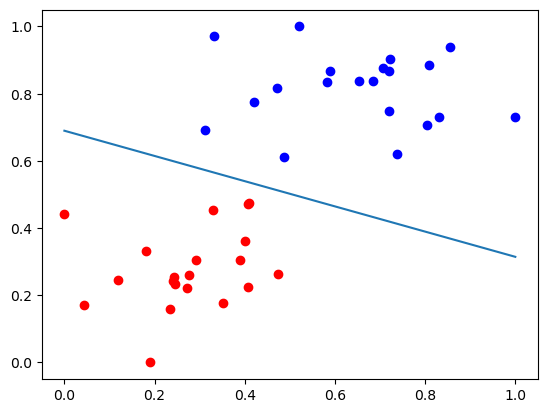

In [57]:
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], c="r")
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], c="b")
graph(W, b, [0, 1])

In [58]:
crossEntropy(y, getLogits(X, W, b))

0.20082167853302818

In [59]:
accuracy(predict(X, W, b), y)

1.0

In [60]:
W, b = logisticRegression(X, y, n_iters=200, learning_rate=0.1, visualize=True)

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 1/200 [00:00<01:01,  3.25it/s]

  1%|          | 2/200 [00:00<00:52,  3.77it/s]

  2%|▏         | 3/200 [00:00<00:53,  3.65it/s]

  2%|▏         | 4/200 [00:01<01:04,  3.02it/s]

  2%|▎         | 5/200 [00:01<01:07,  2.91it/s]

  3%|▎         | 6/200 [00:01<01:03,  3.04it/s]

  4%|▎         | 7/200 [00:02<01:01,  3.15it/s]

  4%|▍         | 8/200 [00:02<01:02,  3.06it/s]

  4%|▍         | 9/200 [00:02<01:02,  3.05it/s]

  5%|▌         | 10/200 [00:03<01:01,  3.09it/s]

  6%|▌         | 11/200 [00:03<01:03,  2.97it/s]

  6%|▌         | 12/200 [00:03<01:07,  2.79it/s]

  6%|▋         | 13/200 [00:04<01:03,  2.94it/s]

  7%|▋         | 14/200 [00:04<00:57,  3.24it/s]

  8%|▊         | 15/200 [00:04<00:55,  3.35it/s]

  8%|▊         | 16/200 [00:05<00:50,  3.61it/s]

  8%|▊         | 17/200 [00:05<00:48,  3.76it/s]

  9%|▉         | 18/200 [00:05<00:45,  3.96it/s]

 10%|▉         | 19/200 [00:05<00:46,  3.88it/s]

 10%|█         | 20/200 [00:06<00:46,  3.85it/s]

 10%|█         | 21/200 [00:06<00:51,  3.47it/s]

 11%|█         | 22/200 [00:06<00:50,  3.56it/s]

 12%|█▏        | 23/200 [00:06<00:47,  3.72it/s]

 12%|█▏        | 24/200 [00:07<00:45,  3.87it/s]

 12%|█▎        | 25/200 [00:07<00:44,  3.91it/s]

 13%|█▎        | 26/200 [00:07<00:44,  3.90it/s]

 14%|█▎        | 27/200 [00:07<00:44,  3.90it/s]

 14%|█▍        | 28/200 [00:08<00:43,  3.93it/s]

 14%|█▍        | 29/200 [00:08<00:48,  3.52it/s]

 15%|█▌        | 30/200 [00:08<00:46,  3.67it/s]

 16%|█▌        | 31/200 [00:08<00:46,  3.65it/s]

 16%|█▌        | 32/200 [00:09<00:46,  3.63it/s]

 16%|█▋        | 33/200 [00:09<00:45,  3.68it/s]

 17%|█▋        | 34/200 [00:09<00:44,  3.75it/s]

 18%|█▊        | 35/200 [00:10<00:43,  3.78it/s]

 18%|█▊        | 36/200 [00:10<00:44,  3.72it/s]

 18%|█▊        | 37/200 [00:10<00:44,  3.69it/s]

 19%|█▉        | 38/200 [00:11<00:54,  2.97it/s]

 20%|█▉        | 39/200 [00:11<00:53,  2.99it/s]

 20%|██        | 40/200 [00:11<00:52,  3.08it/s]

 20%|██        | 41/200 [00:12<00:56,  2.80it/s]

 21%|██        | 42/200 [00:12<00:53,  2.94it/s]

 22%|██▏       | 43/200 [00:12<00:52,  2.98it/s]

 22%|██▏       | 44/200 [00:13<00:51,  3.04it/s]

 22%|██▎       | 45/200 [00:13<00:53,  2.91it/s]

 23%|██▎       | 46/200 [00:13<00:56,  2.74it/s]

 24%|██▎       | 47/200 [00:14<00:53,  2.85it/s]

 24%|██▍       | 48/200 [00:14<00:55,  2.75it/s]

 24%|██▍       | 49/200 [00:14<00:53,  2.83it/s]

 25%|██▌       | 50/200 [00:15<00:49,  3.04it/s]

 26%|██▌       | 51/200 [00:15<00:40,  3.72it/s]

 26%|██▌       | 52/200 [00:15<00:33,  4.47it/s]

 26%|██▋       | 53/200 [00:15<00:28,  5.16it/s]

 27%|██▋       | 54/200 [00:15<00:25,  5.82it/s]

 28%|██▊       | 55/200 [00:15<00:25,  5.68it/s]

 28%|██▊       | 56/200 [00:15<00:23,  6.23it/s]

 28%|██▊       | 57/200 [00:16<00:21,  6.78it/s]

 29%|██▉       | 58/200 [00:16<00:20,  6.90it/s]

 30%|██▉       | 59/200 [00:16<00:21,  6.52it/s]

 30%|███       | 60/200 [00:16<00:20,  6.73it/s]

 30%|███       | 61/200 [00:16<00:20,  6.92it/s]

 31%|███       | 62/200 [00:16<00:19,  7.13it/s]

 32%|███▏      | 63/200 [00:16<00:18,  7.46it/s]

 32%|███▏      | 64/200 [00:17<00:19,  6.90it/s]

 32%|███▎      | 65/200 [00:17<00:18,  7.32it/s]

 33%|███▎      | 66/200 [00:17<00:17,  7.65it/s]

 34%|███▎      | 67/200 [00:17<00:16,  7.85it/s]

 34%|███▍      | 68/200 [00:17<00:18,  7.12it/s]

 34%|███▍      | 69/200 [00:17<00:18,  7.17it/s]

 35%|███▌      | 70/200 [00:17<00:17,  7.29it/s]

 36%|███▌      | 71/200 [00:18<00:17,  7.54it/s]

 36%|███▌      | 72/200 [00:18<00:18,  6.85it/s]

 36%|███▋      | 73/200 [00:18<00:17,  7.29it/s]

 37%|███▋      | 74/200 [00:18<00:16,  7.61it/s]

 38%|███▊      | 75/200 [00:18<00:16,  7.72it/s]

 38%|███▊      | 76/200 [00:18<00:17,  7.14it/s]

 38%|███▊      | 77/200 [00:18<00:17,  6.92it/s]

 39%|███▉      | 78/200 [00:19<00:17,  7.02it/s]

 40%|███▉      | 79/200 [00:19<00:16,  7.38it/s]

 40%|████      | 80/200 [00:19<00:16,  7.49it/s]

 40%|████      | 81/200 [00:19<00:18,  6.53it/s]

 41%|████      | 82/200 [00:19<00:16,  7.03it/s]

 42%|████▏     | 83/200 [00:19<00:15,  7.52it/s]

 42%|████▏     | 84/200 [00:19<00:14,  7.78it/s]

 42%|████▎     | 85/200 [00:19<00:14,  8.05it/s]

 43%|████▎     | 86/200 [00:20<00:15,  7.25it/s]

 44%|████▎     | 87/200 [00:20<00:15,  7.40it/s]

 44%|████▍     | 88/200 [00:20<00:15,  7.37it/s]

 44%|████▍     | 89/200 [00:20<00:16,  6.65it/s]

 45%|████▌     | 90/200 [00:20<00:15,  7.12it/s]

 46%|████▌     | 91/200 [00:20<00:14,  7.53it/s]

 46%|████▌     | 92/200 [00:20<00:14,  7.71it/s]

 46%|████▋     | 93/200 [00:21<00:13,  7.84it/s]

 47%|████▋     | 94/200 [00:21<00:13,  8.06it/s]

 48%|████▊     | 95/200 [00:21<00:14,  7.39it/s]

 48%|████▊     | 96/200 [00:21<00:15,  6.65it/s]

 48%|████▊     | 97/200 [00:21<00:16,  6.06it/s]

 49%|████▉     | 98/200 [00:22<00:25,  4.02it/s]

 50%|████▉     | 99/200 [00:22<00:24,  4.08it/s]

 50%|█████     | 100/200 [00:22<00:21,  4.60it/s]

 50%|█████     | 101/200 [00:22<00:19,  5.13it/s]

 51%|█████     | 102/200 [00:22<00:18,  5.19it/s]

 52%|█████▏    | 103/200 [00:23<00:17,  5.61it/s]

 52%|█████▏    | 104/200 [00:23<00:16,  5.81it/s]

 52%|█████▎    | 105/200 [00:23<00:15,  5.99it/s]

 53%|█████▎    | 106/200 [00:23<00:17,  5.23it/s]

 54%|█████▎    | 107/200 [00:23<00:16,  5.61it/s]

 54%|█████▍    | 108/200 [00:23<00:15,  5.94it/s]

 55%|█████▍    | 109/200 [00:23<00:14,  6.43it/s]

 55%|█████▌    | 110/200 [00:24<00:13,  6.90it/s]

 56%|█████▌    | 111/200 [00:24<00:12,  7.23it/s]

 56%|█████▌    | 112/200 [00:24<00:11,  7.53it/s]

 56%|█████▋    | 113/200 [00:24<00:11,  7.59it/s]

 57%|█████▋    | 114/200 [00:24<00:11,  7.39it/s]

 57%|█████▊    | 115/200 [00:24<00:14,  6.02it/s]

 58%|█████▊    | 116/200 [00:25<00:14,  5.73it/s]

 58%|█████▊    | 117/200 [00:25<00:13,  6.11it/s]

 59%|█████▉    | 118/200 [00:25<00:12,  6.32it/s]

 60%|█████▉    | 119/200 [00:25<00:12,  6.60it/s]

 60%|██████    | 120/200 [00:25<00:11,  6.89it/s]

 60%|██████    | 121/200 [00:25<00:11,  7.09it/s]

 61%|██████    | 122/200 [00:25<00:11,  6.79it/s]

 62%|██████▏   | 123/200 [00:26<00:12,  6.05it/s]

 62%|██████▏   | 124/200 [00:26<00:11,  6.64it/s]

 62%|██████▎   | 125/200 [00:26<00:11,  6.81it/s]

 63%|██████▎   | 126/200 [00:26<00:10,  7.12it/s]

 64%|██████▎   | 127/200 [00:26<00:09,  7.36it/s]

 64%|██████▍   | 128/200 [00:26<00:09,  7.49it/s]

 64%|██████▍   | 129/200 [00:26<00:09,  7.84it/s]

 65%|██████▌   | 130/200 [00:26<00:08,  8.11it/s]

 66%|██████▌   | 131/200 [00:27<00:08,  8.16it/s]

 66%|██████▌   | 132/200 [00:27<00:09,  7.25it/s]

 66%|██████▋   | 133/200 [00:27<00:08,  7.61it/s]

 67%|██████▋   | 134/200 [00:27<00:08,  7.88it/s]

 68%|██████▊   | 135/200 [00:27<00:08,  7.99it/s]

 68%|██████▊   | 136/200 [00:27<00:07,  8.07it/s]

 68%|██████▊   | 137/200 [00:27<00:07,  8.08it/s]

 69%|██████▉   | 138/200 [00:27<00:07,  7.99it/s]

 70%|██████▉   | 139/200 [00:28<00:07,  8.04it/s]

 70%|███████   | 140/200 [00:28<00:08,  7.14it/s]

 70%|███████   | 141/200 [00:28<00:07,  7.41it/s]

 71%|███████   | 142/200 [00:28<00:07,  7.57it/s]

 72%|███████▏  | 143/200 [00:28<00:07,  7.76it/s]

 72%|███████▏  | 144/200 [00:28<00:07,  7.93it/s]

 72%|███████▎  | 145/200 [00:28<00:06,  8.02it/s]

 73%|███████▎  | 146/200 [00:29<00:06,  8.06it/s]

 74%|███████▎  | 147/200 [00:29<00:06,  7.86it/s]

 74%|███████▍  | 148/200 [00:29<00:07,  7.00it/s]

 74%|███████▍  | 149/200 [00:29<00:06,  7.37it/s]

 75%|███████▌  | 150/200 [00:29<00:06,  7.24it/s]

 76%|███████▌  | 151/200 [00:29<00:06,  7.29it/s]

 76%|███████▌  | 152/200 [00:29<00:06,  7.57it/s]

 76%|███████▋  | 153/200 [00:29<00:06,  7.56it/s]

 77%|███████▋  | 154/200 [00:30<00:05,  7.77it/s]

 78%|███████▊  | 155/200 [00:30<00:05,  7.86it/s]

 78%|███████▊  | 156/200 [00:30<00:06,  7.09it/s]

 78%|███████▊  | 157/200 [00:30<00:05,  7.28it/s]

 79%|███████▉  | 158/200 [00:30<00:05,  7.47it/s]

 80%|███████▉  | 159/200 [00:30<00:05,  7.27it/s]

 80%|████████  | 160/200 [00:30<00:05,  7.32it/s]

 80%|████████  | 161/200 [00:31<00:05,  7.52it/s]

 81%|████████  | 162/200 [00:31<00:05,  7.30it/s]

 82%|████████▏ | 163/200 [00:31<00:04,  7.44it/s]

 82%|████████▏ | 164/200 [00:31<00:05,  6.46it/s]

 82%|████████▎ | 165/200 [00:31<00:05,  6.99it/s]

 83%|████████▎ | 166/200 [00:31<00:04,  7.38it/s]

 84%|████████▎ | 167/200 [00:31<00:04,  7.55it/s]

 84%|████████▍ | 168/200 [00:32<00:04,  7.23it/s]

 84%|████████▍ | 169/200 [00:32<00:04,  7.58it/s]

 85%|████████▌ | 170/200 [00:32<00:03,  7.73it/s]

 86%|████████▌ | 171/200 [00:32<00:03,  7.80it/s]

 86%|████████▌ | 172/200 [00:32<00:03,  7.75it/s]

 86%|████████▋ | 173/200 [00:32<00:03,  7.09it/s]

 87%|████████▋ | 174/200 [00:32<00:03,  7.18it/s]

 88%|████████▊ | 175/200 [00:32<00:03,  7.33it/s]

 88%|████████▊ | 176/200 [00:33<00:03,  7.32it/s]

 88%|████████▊ | 177/200 [00:33<00:03,  6.46it/s]

 89%|████████▉ | 178/200 [00:33<00:03,  6.74it/s]

 90%|████████▉ | 179/200 [00:33<00:03,  6.92it/s]

 90%|█████████ | 180/200 [00:33<00:02,  7.08it/s]

 90%|█████████ | 181/200 [00:33<00:02,  6.38it/s]

 91%|█████████ | 182/200 [00:34<00:02,  6.37it/s]

 92%|█████████▏| 183/200 [00:34<00:02,  6.50it/s]

 92%|█████████▏| 184/200 [00:34<00:02,  6.58it/s]

 92%|█████████▎| 185/200 [00:34<00:02,  6.85it/s]

 93%|█████████▎| 186/200 [00:34<00:02,  6.73it/s]

 94%|█████████▎| 187/200 [00:34<00:01,  6.98it/s]

 94%|█████████▍| 188/200 [00:34<00:01,  7.15it/s]

 94%|█████████▍| 189/200 [00:35<00:01,  7.31it/s]

 95%|█████████▌| 190/200 [00:35<00:01,  6.56it/s]

 96%|█████████▌| 191/200 [00:35<00:01,  6.94it/s]

 96%|█████████▌| 192/200 [00:35<00:01,  7.26it/s]

 96%|█████████▋| 193/200 [00:35<00:01,  6.61it/s]

 97%|█████████▋| 194/200 [00:35<00:00,  6.75it/s]

 98%|█████████▊| 195/200 [00:35<00:00,  7.04it/s]

 98%|█████████▊| 196/200 [00:36<00:00,  7.17it/s]

 98%|█████████▊| 197/200 [00:36<00:00,  7.13it/s]

 99%|█████████▉| 198/200 [00:36<00:00,  5.71it/s]

100%|█████████▉| 199/200 [00:36<00:00,  5.85it/s]

100%|██████████| 200/200 [00:36<00:00,  5.44it/s]


In [61]:
accuracy(predict(X, W, b), y)

0.95

In [62]:
crossEntropy(y, getLogits(X, W, b))

0.46022054769952386

In [63]:
X = np.array(
    [
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1],
    ]
)

In [64]:
# AND
Y_and = np.array([0, 0, 0, 1])

In [65]:
W, b = logisticRegression(X, Y_and)

100%|██████████| 10000/10000 [00:00<00:00, 34571.07it/s]


In [66]:
accuracy(predict(X, W, b), Y_and)

1.0

In [67]:
# XOR
Y_xor = np.array([0, 1, 1, 0])

In [68]:
W, b = logisticRegression(X, Y_xor)

100%|██████████| 10000/10000 [00:00<00:00, 27874.98it/s]


In [69]:
accuracy(predict(X, W, b), Y_xor)

0.75